# EECS4404 Project 1

Jimmy Le<br>
216143992<br>
Prof. Archit Garg<br>
EECS4404 SU 2022

## Task: Predict the Penguin Species

We are given several datapoints:<br>
    o species: penguin species (Chinstrap, Adélie, or Gentoo)<br>
    o culmen_length_mm: culmen length (mm)<br>
    o culmen_depth_mm: culmen depth (mm)<br>
    o flipper_length_mm: flipper length (mm)<br>
    o body_mass_g: body mass (g)<br>
    o island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)<br>
    o sex: penguin sex<br>

## References

Code Process and Method: EECS4404 Class Notes & Jupyter Examples<br>
Learning Curve & Graph: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py'
&
https://www.youtube.com/watch?v=2Bkp4B8sJ2Y<br>

To Demonstrate full understanding of the code, full documentation and explaination of the code will be provided.

#### We start by performing an exploratory data analysis on the dataset

We first explore the continous features of the dataset, that is culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g features

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

penguin = pd.read_csv('penguins_size.csv')
penguin.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
#Drop categorical features to focus on continous
#Note however we do keep species, which is our target variable
cat_feat = ['island', 'sex']
penguin.drop(cat_feat, axis=1, inplace=True)
penguin.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0


In [4]:
#To make our data analysis easier, we will convert species a numerical variable
#Where Adelie is 1, Chinstrap 2, Gentoo 3
penguin['species'] = penguin['species'].map({'Adelie': 1, 'Chinstrap' : 2, 'Gentoo': 3}) 
penguin.head(344)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,1,39.1,18.7,181.0,3750.0
1,1,39.5,17.4,186.0,3800.0
2,1,40.3,18.0,195.0,3250.0
3,1,NaN,NaN,NaN,NaN
4,1,36.7,19.3,193.0,3450.0
...,...,...,...,...,...
339,3,NaN,NaN,NaN,NaN
340,3,46.8,14.3,215.0,4850.0
341,3,50.4,15.7,222.0,5750.0
342,3,45.2,14.8,212.0,5200.0


In [5]:
#We will use describe to help understand the shape, count, and distrubution of this data
penguin.describe()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,342.000000,342.000000,342.000000,342.000000
mean,1.918605,43.921930,17.151170,200.915205,4201.754386
std,0.893320,5.459584,1.974793,14.061714,801.954536
min,1.000000,32.100000,13.100000,172.000000,2700.000000
25%,1.000000,39.225000,15.600000,190.000000,3550.000000
50%,2.000000,44.450000,17.300000,197.000000,4050.000000
75%,3.000000,48.500000,18.700000,213.000000,4750.000000
max,3.000000,59.600000,21.500000,231.000000,6300.000000


In [6]:
penguin.groupby('species').mean()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
1,38.791391,18.346358,189.953642,3700.662252
2,48.833824,18.420588,195.823529,3733.088235
3,47.504878,14.982114,217.186992,5076.016260


c:\Users\Jimmy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


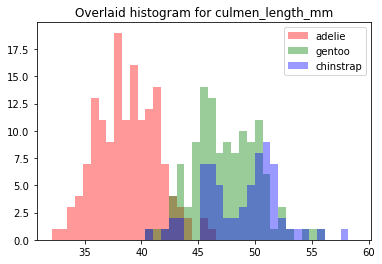

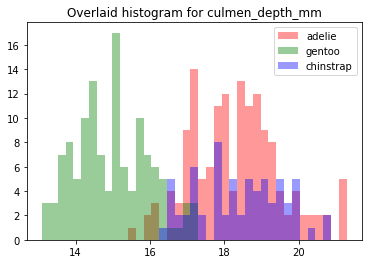

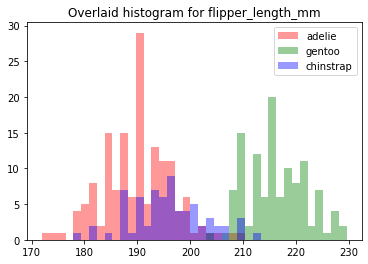

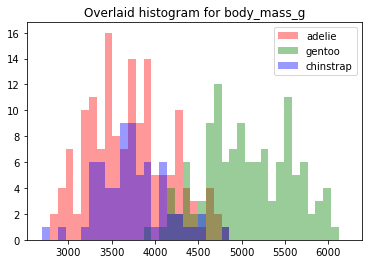

In [7]:
#From initial observations, it appears that:
#    Adelie penguins (1) appear to have smaller culmen_length than their counterparts
#    Gentoo penguins (3) appear to have smaller culmen_depth and larger flipper_length and body_mass
#    Chinstrap pengiuins (2) appear to have longer culmen_length and flipper length than their other counterparts, more analysis is needed

#We can get a visual representation below
for i in ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    adelie = list(penguin[penguin['species'] == 1][i].dropna())
    chinstrap = list(penguin[penguin['species'] == 2][i].dropna())
    gentoo = list(penguin[penguin['species'] == 3][i].dropna())
    xmin = min(min(adelie), min(chinstrap), min(gentoo))
    xmax = max(max(adelie), max(chinstrap), max(gentoo))
    width = (xmax - xmin) / 40
    sns.distplot(adelie, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(gentoo, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(chinstrap, color='b', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['adelie', 'gentoo', 'chinstrap'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

In [8]:
#From the plot and the mean graphs, it appears that body_mass and flipper_length are highly correlated
#We can drop one variable to avoid multilinearity 
penguin.drop(columns=['body_mass_g'], axis=1, inplace=True)

In [9]:
#Check to see which values are missing
penguin.groupby(penguin['culmen_length_mm'].isnull()).mean()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm
culmen_length_mm,,,,
False,1.918129,43.92193,17.15117,200.915205
True,2.000000,NaN,NaN,NaN


In [10]:
#Fill in Missing Values by replacing them with the average values in their respective columns
penguin['culmen_length_mm'].fillna(penguin['culmen_length_mm'].mean(), inplace=True)
penguin['culmen_depth_mm'].fillna(penguin['culmen_depth_mm'].mean(), inplace=True)
penguin['flipper_length_mm'].fillna(penguin['flipper_length_mm'].mean(), inplace=True)
penguin.isnull().sum() #0s mean no missing values

species              0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
dtype: int64

## Explore Categorical Features

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

penguin = pd.read_csv('penguins_size.csv')
penguin.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [12]:
# Drop our continous features
# Note however for consistency reasons we keep our target variable and convert it to our numerical representation as before
cont_feat = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguin.drop(cont_feat, axis=1, inplace=True)

# Adelie is 1, Chinstrap 2, Gentoo 3
penguin['species'] = penguin['species'].map({'Adelie': 1, 'Chinstrap' : 2, 'Gentoo': 3}) 
penguin.head(344)

,species,island,sex
0,1,Torgersen,MALE
1,1,Torgersen,FEMALE
2,1,Torgersen,FEMALE
3,1,Torgersen,NaN
4,1,Torgersen,FEMALE
...,...,...,...
339,3,Biscoe,NaN
340,3,Biscoe,FEMALE
341,3,Biscoe,MALE
342,3,Biscoe,FEMALE


In [13]:
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   species  344 non-null    int64 
 1   island   344 non-null    object
 2   sex      334 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.2+ KB


In [14]:
# From the above, we see that we have rows in which our categorical features are null
# Let's drop these values 

penguin = penguin[penguin.sex != '.'] #There is one row with a '.' On the class discord, Prof. Garg reccomends replacing/removing the value
penguin.dropna(subset=['island', 'sex'])

,species,island,sex
0,1,Torgersen,MALE
1,1,Torgersen,FEMALE
2,1,Torgersen,FEMALE
4,1,Torgersen,FEMALE
5,1,Torgersen,MALE
...,...,...,...
338,3,Biscoe,FEMALE
340,3,Biscoe,FEMALE
341,3,Biscoe,MALE
342,3,Biscoe,FEMALE


<Figure size 432x288 with 0 Axes>

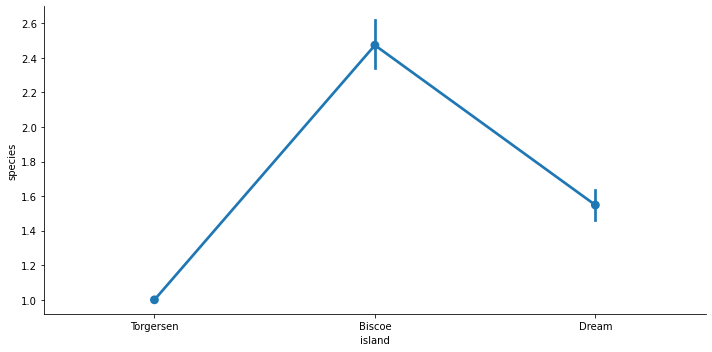

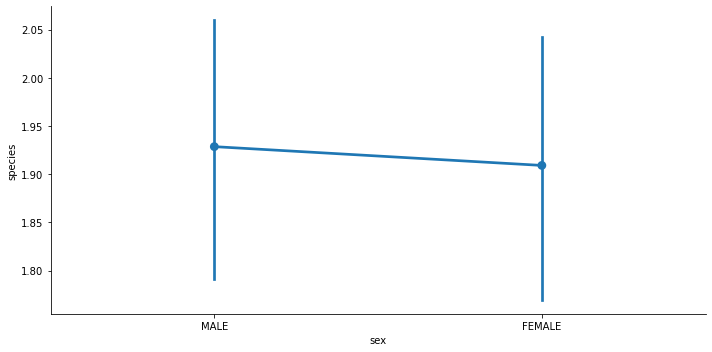

In [15]:
# Plot categorical features
for i, col in enumerate(['island', 'sex']):
    plt.figure(i)
    sns.catplot(x=col, y='species', data=penguin, kind='point', aspect=2, )

In [16]:
# Obviously, it appears that sex has no real impact on determining the species of the penguin
# But it appears that the island may have an impact on the type of penguin
penguin.groupby('island').mean()

,species
island,
Biscoe,2.473054
Dream,1.548387
Torgersen,1.000000


* Only adelie penguins are found at Torgersen
* At biscoe island, it is more likely to find Gentoo penguins
* At dream island, it is likely to find a mix of both adelie and chinstrap penguins



# Exploratory Data Analysis Conclusions

* Adelie penguins (1) appear to have smaller culmen_length than their counterparts
* Gentoo penguins (3) appear to have smaller culmen_depth and larger flipper_length and body_mass
* Chinstrap pengiuins (2) appear to have longer culmen_length and flipper length than their other counterparts, more analysis is needed
* It appears that flipper_length_mm and body_mass_g are highly correlated, with one of which likely being able to be dropped to avoid multilinearity 
* Adelie penguins are only found at Torgersen. Biscoe island is likely to find Gentoo penguins. At Dream island, a mix of both adelie and chinstrap can be found
* Sex is not a useful indicator and can be dropped

# Clean Data

We read in our data again and clean using the lessons we learned from our exploratory data analysis

## Continous Features

* Convert 'species' to numerical values
* Drop 'body_mass_g'
* Replace remaining continous variables with mean values

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

penguin = pd.read_csv('penguins_size.csv')
penguin.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [18]:
#To make our data analysis easier, we will convert species a numerical variable
#Where Adelie is 1, Chinstrap 2, Gentoo 3
penguin['species'] = penguin['species'].map({'Adelie': 1, 'Chinstrap' : 2, 'Gentoo': 3}) 
penguin.head(344)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,1,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,1,Torgersen,NaN,NaN,NaN,NaN,NaN
4,1,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,3,Biscoe,NaN,NaN,NaN,NaN,NaN
340,3,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,3,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,3,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [19]:
#From the plot and the mean graphs, it appears that body_mass and flipper_length are highly correlated
#We can drop one variable to avoid multilinearity 
penguin.drop(columns=['body_mass_g'], axis=1, inplace=True)
penguin.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex
0,1,Torgersen,39.1,18.7,181.0,MALE
1,1,Torgersen,39.5,17.4,186.0,FEMALE
2,1,Torgersen,40.3,18.0,195.0,FEMALE
3,1,Torgersen,NaN,NaN,NaN,NaN
4,1,Torgersen,36.7,19.3,193.0,FEMALE


In [20]:
#Fill in Missing Values by replacing them with the average values in their respective columns
penguin['culmen_length_mm'].fillna(penguin['culmen_length_mm'].mean(), inplace=True)
penguin['culmen_depth_mm'].fillna(penguin['culmen_depth_mm'].mean(), inplace=True)
penguin['flipper_length_mm'].fillna(penguin['flipper_length_mm'].mean(), inplace=True)
penguin.isnull().sum() #0s mean no missing values

species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
sex                  10
dtype: int64

## Categorical Features

* Omit rows that have categorical values that are null
* We drop the 'sex' column, as it does not contribute to finding our target variable ('species')
* Change values to numeric so it is easier for our model to understand

In [21]:
#Drop rows which have our categorical features that are null
penguin.drop(columns=['sex'], axis=1, inplace=True)
penguin.dropna(subset=['island'])
penguin.isnull().sum() #0s mean no missing values

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
dtype: int64

In [22]:
#To make our data analysis easier, we will convert species a numerical variable
#Where Torgerson is 1, Biscoe 2, Dream 3
penguin['island'] = penguin['island'].map({'Torgersen': 1, 'Biscoe' : 2, 'Dream': 3}) 
penguin.head(344)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm
0,1,1,39.10000,18.70000,181.000000
1,1,1,39.50000,17.40000,186.000000
2,1,1,40.30000,18.00000,195.000000
3,1,1,43.92193,17.15117,200.915205
4,1,1,36.70000,19.30000,193.000000
...,...,...,...,...,...
339,3,2,43.92193,17.15117,200.915205
340,3,2,46.80000,14.30000,215.000000
341,3,2,50.40000,15.70000,222.000000
342,3,2,45.20000,14.80000,212.000000


In [23]:
#Write out our now cleaned data
penguin.to_csv('penguins_size_cleaned.csv', index=False)

# Split data (60-20-20 ratio)

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

penguin = pd.read_csv('penguins_size_cleaned.csv')
penguin.head()

#Split into train, validation, and test set


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm
0,1,1,39.10000,18.70000,181.000000
1,1,1,39.50000,17.40000,186.000000
2,1,1,40.30000,18.00000,195.000000
3,1,1,43.92193,17.15117,200.915205
4,1,1,36.70000,19.30000,193.000000


In [25]:
#Split into our features and labels
features = penguin.drop('species', axis=1)
labels = penguin['species']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [26]:
#Verify split data 60-20-20
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset)/len(labels), 2))

0.6
0.2
0.2


In [27]:
#Write out our data sets
X_train.to_csv('train_features.csv', index=False)
X_val.to_csv('val_features.csv', index=False)
X_test.to_csv('test_features.csv', index=False)

y_train.to_csv('train_labels.csv', index=False)
y_val.to_csv('val_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)

## Random Forest: Fit and Evaluate

In [28]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

In [29]:
#Write method to print results
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [30]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 5}

0.957 (+/-0.055) for {'max_depth': 2, 'n_estimators': 5}
0.966 (+/-0.038) for {'max_depth': 2, 'n_estimators': 50}
0.971 (+/-0.019) for {'max_depth': 2, 'n_estimators': 250}
0.976 (+/-0.03) for {'max_depth': 4, 'n_estimators': 5}
0.976 (+/-0.03) for {'max_depth': 4, 'n_estimators': 50}
0.976 (+/-0.03) for {'max_depth': 4, 'n_estimators': 250}
0.951 (+/-0.053) for {'max_depth': 8, 'n_estimators': 5}
0.976 (+/-0.03) for {'max_depth': 8, 'n_estimators': 50}
0.976 (+/-0.03) for {'max_depth': 8, 'n_estimators': 250}
0.966 (+/-0.038) for {'max_depth': 16, 'n_estimators': 5}
0.976 (+/-0.03) for {'max_depth': 16, 'n_estimators': 50}
0.976 (+/-0.03) for {'max_depth': 16, 'n_estimators': 250}
0.966 (+/-0.039) for {'max_depth': 32, 'n_estimators': 5}
0.976 (+/-0.03) for {'max_depth': 32, 'n_estimators': 50}
0.976 (+/-0.03) for {'max_depth': 32, 'n_estimators': 250}
0.961 (+/-0.065) for {'max_depth': None, 'n_estimators': 5}
0.976 (+/-0.043) for {'

NOTE!!: Learning Curve Reference From:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py'
&
https://www.youtube.com/watch?v=2Bkp4B8sJ2Y

Will comment/document code thoroughly to demonstrate understanding of referenced code

In [31]:
## The learning curve function function in Scikit learn determines scores for cross validation training
train_sizes, train_scores, test_scores = learning_curve(rf, tr_features, tr_labels, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50), verbose=1)

[learning_curve] Training set sizes: [  1   4   8  11  14  18  21  24  28  31  34  38  41  44  48  51  54  57
  61  64  67  71  74  77  81  84  87  91  94  97 101 104 107 110 114 117
 120 124 127 130 134 137 140 144 147 150 154 157 160 164]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.8s finished


In [32]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

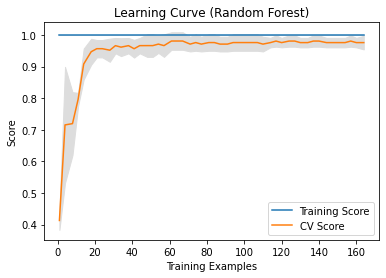

In [33]:
plt.plot(train_sizes, train_scores_mean, label = 'Training Score')
plt.plot(train_sizes, test_scores_mean, label = 'CV Score')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='#DDDDDD')

plt.title('Learning Curve (Random Forest)')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc = 'best')

In [34]:
# Write out pickled model
joblib.dump(cv.best_estimator_,"RF_602020.pkl")

['RF_602020.pkl']

## Boosted Forest: Fit and Evaluate

In [35]:
import joblib
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

In [36]:
#Write method to print results
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [37]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}

0.427 (+/-0.022) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.917 (+/-0.05) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.961 (+/-0.039) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.981 (+/-0.036) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.427 (+/-0.022) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.971 (+/-0.036) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.971 (+/-0.036) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.971 (+/-0.036) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.427 (+/-0.022) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.976 (+/-0.03) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.976 (+/-0.03) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.976 (+/-0.03) for {'learning_rate

[learning_curve] Training set sizes: [  1   4   8  11  14  18  21  24  28  31  34  38  41  44  48  51  54  57
  61  64  67  71  74  77  81  84  87  91  94  97 101 104 107 110 114 117
 120 124 127 130 134 137 140 144 147 150 154 157 160 164]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   24.7s finished


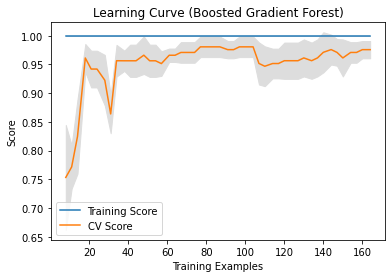

In [38]:
## The learning curve function function in Scikit learn determines scores for cross validation training
train_sizes, train_scores, test_scores = learning_curve(gb, tr_features, tr_labels, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50), verbose=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training Score')
plt.plot(train_sizes, test_scores_mean, label = 'CV Score')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='#DDDDDD')

plt.title('Learning Curve (Boosted Gradient Forest)')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc = 'best')

In [39]:
#Write out pickled model
joblib.dump(cv.best_estimator_, 'GB_602020.pkl')

['GB_602020.pkl']

## SVM: Fit and Evaluate

In [40]:
import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

In [41]:
#Write method to print results
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [42]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.986 (+/-0.038) for {'C': 0.1, 'kernel': 'linear'}
0.427 (+/-0.022) for {'C': 0.1, 'kernel': 'rbf'}
0.99 (+/-0.038) for {'C': 1, 'kernel': 'linear'}
0.772 (+/-0.021) for {'C': 1, 'kernel': 'rbf'}
0.981 (+/-0.036) for {'C': 10, 'kernel': 'linear'}
0.937 (+/-0.048) for {'C': 10, 'kernel': 'rbf'}


[learning_curve] Training set sizes: [  1   4   8  11  14  18  21  24  28  31  34  38  41  44  48  51  54  57
  61  64  67  71  74  77  81  84  87  91  94  97 101 104 107 110 114 117
 120 124 127 130 134 137 140 144 147 150 154 157 160 164]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    1.2s finished


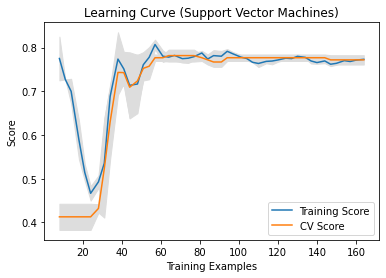

In [43]:
## The learning curve function function in Scikit learn determines scores for cross validation training
train_sizes, train_scores, test_scores = learning_curve(svc, tr_features, tr_labels, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50), verbose=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training Score')
plt.plot(train_sizes, test_scores_mean, label = 'CV Score')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='#DDDDDD')

plt.title('Learning Curve (Support Vector Machines)')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc = 'best')

In [44]:
#Write out pickled model
joblib.dump(cv.best_estimator_, 'SVM_602020.pkl')

['SVM_602020.pkl']

## Validate and Test (60-20-20 set)

In [45]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

val_features = pd.read_csv('val_features.csv')
val_labels = pd.read_csv('val_labels.csv')

te_features = pd.read_csv('test_features.csv')
te_labels = pd.read_csv('test_labels.csv')

In [46]:
models = {}

for mdl in ['SVM', 'RF', 'GB']:
    models[mdl] = joblib.load('{}_602020.pkl'.format(mdl))

In [47]:
models

{'SVM': SVC(C=1, kernel='linear'),
 'RF': RandomForestClassifier(max_depth=4, n_estimators=5),
 'GB': GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=500)}

In [48]:
#Evaluate models on the validation set
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='micro'), 3)
    recall = round(recall_score(labels, pred, average='micro'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [49]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

SVM -- Accuracy: 0.986 / Precision: 0.986 / Recall: 0.986 / Latency: 4.0ms
RF -- Accuracy: 0.986 / Precision: 0.986 / Recall: 0.986 / Latency: 4.0ms
GB -- Accuracy: 0.986 / Precision: 0.986 / Recall: 0.986 / Latency: 5.0ms


In [50]:
# Evaluate Random Forest on test set
evaluate_model('Random Forest', models['RF'], te_features, te_labels)

Random Forest -- Accuracy: 0.957 / Precision: 0.957 / Recall: 0.957 / Latency: 5.0ms


# Analysis and Comparison of Results (60-20-20)

Observations/Comparisons:
* RF performed the best in terms of accuracy, precsion, and recall on the validation set
* SVM and Gradient Boosting typically performed just as well as each other on the validation set
* RF however had the longest latency, at least double that of the other two on the validation set
* In the training set, the performance score across each model were comparable, with the best scores being 0.98 +- 0.01
* All learning curves for all three models demonstrate RF, SVM, and GB better generalize with more training samples
* Random Forest's learning curve shows the most consistent convergence to a high training score with little variance around both the training and CV lines (shaded areas)

Best model: Random Forest<br>
Explaination: Random Forest appears to shows the best accuracy, precision, and recall scores across the three tested models. The best indicator of this performance is the learning curve for Random Forest, showing the cross validation and training score converging to a relatively (vs. cross validation/testing convergence scores for SVM, GB) high score. The shaded areas around the training and CV line represent the error due to bias and variance. Comparitively to the other graphs, RF has the smallest error due to bias and variance.<br>
Observing the properties of Random Forest, they are best able to key in on important relationships in data and avoid overfitting due to ensemble learning technique. That is, they combine their observations on many subsets of data in the form of a multiple decision trees to consolidate a single decision (via majority voting), which avoids overfitting and bias-variance dilemma (as seen in the results).

# Split Data (80-10-10 ratio)

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split

penguin = pd.read_csv('penguins_size_cleaned.csv')
penguin.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm
0,1,1,39.10000,18.70000,181.000000
1,1,1,39.50000,17.40000,186.000000
2,1,1,40.30000,18.00000,195.000000
3,1,1,43.92193,17.15117,200.915205
4,1,1,36.70000,19.30000,193.000000


In [52]:
#Split into our features and labels
features = penguin.drop('species', axis=1)
labels = penguin['species']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [53]:
#Verify split data 80-10-10
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset)/len(labels), 2))

0.8
0.1
0.1


In [54]:
#Write out our data sets
X_train.to_csv('train_features.csv', index=False)
X_val.to_csv('val_features.csv', index=False)
X_test.to_csv('test_features.csv', index=False)

y_train.to_csv('train_labels.csv', index=False)
y_val.to_csv('val_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)

## Random Forest: Fit and Evaluate

In [55]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

In [56]:
#Write method to print results
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [57]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 50}

0.945 (+/-0.046) for {'max_depth': 2, 'n_estimators': 5}
0.967 (+/-0.027) for {'max_depth': 2, 'n_estimators': 50}
0.967 (+/-0.027) for {'max_depth': 2, 'n_estimators': 250}
0.96 (+/-0.015) for {'max_depth': 4, 'n_estimators': 5}
0.975 (+/-0.029) for {'max_depth': 4, 'n_estimators': 50}
0.967 (+/-0.027) for {'max_depth': 4, 'n_estimators': 250}
0.975 (+/-0.018) for {'max_depth': 8, 'n_estimators': 5}
0.971 (+/-0.018) for {'max_depth': 8, 'n_estimators': 50}
0.971 (+/-0.018) for {'max_depth': 8, 'n_estimators': 250}
0.96 (+/-0.042) for {'max_depth': 16, 'n_estimators': 5}
0.967 (+/-0.027) for {'max_depth': 16, 'n_estimators': 50}
0.967 (+/-0.015) for {'max_depth': 16, 'n_estimators': 250}
0.967 (+/-0.042) for {'max_depth': 32, 'n_estimators': 5}
0.971 (+/-0.018) for {'max_depth': 32, 'n_estimators': 50}
0.971 (+/-0.018) for {'max_depth': 32, 'n_estimators': 250}
0.964 (+/-0.033) for {'max_depth': None, 'n_estimators': 5}
0.967 (+/-0.015

In [58]:
## The learning curve function function in Scikit learn determines scores for cross validation training
train_sizes, train_scores, test_scores = learning_curve(rf, tr_features, tr_labels, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50), verbose=1)

[learning_curve] Training set sizes: [  2   6  11  15  19  24  28  33  37  42  46  51  55  59  64  68  73  77
  82  86  91  95  99 104 108 113 117 122 126 131 135 139 144 148 153 157
 162 166 171 175 179 184 188 193 197 202 206 211 215 220]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   20.0s finished


In [59]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

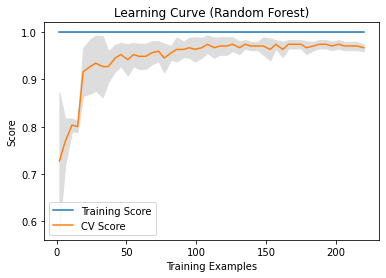

In [60]:
plt.plot(train_sizes, train_scores_mean, label = 'Training Score')
plt.plot(train_sizes, test_scores_mean, label = 'CV Score')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='#DDDDDD')

plt.title('Learning Curve (Random Forest)')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc = 'best')

In [61]:
# Write out pickled model
joblib.dump(cv.best_estimator_,"RF_801010.pkl")

['RF_801010.pkl']

## Boosted Forest: Fit and Evaluate

In [62]:
import joblib
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

In [63]:
#Write method to print results
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [64]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

0.436 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.938 (+/-0.037) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.96 (+/-0.027) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.967 (+/-0.027) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.436 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.978 (+/-0.015) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.975 (+/-0.018) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.975 (+/-0.018) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.436 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.975 (+/-0.029) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.975 (+/-0.029) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.975 (+/-0.029) for {'learning_rate': 0

[learning_curve] Training set sizes: [  2   6  11  15  19  24  28  33  37  42  46  51  55  59  64  68  73  77
  82  86  91  95  99 104 108 113 117 122 126 131 135 139 144 148 153 157
 162 166 171 175 179 184 188 193 197 202 206 211 215 220]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.4s finished


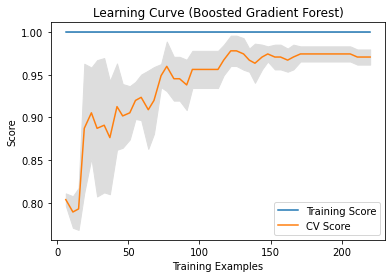

In [65]:
## The learning curve function function in Scikit learn determines scores for cross validation training
train_sizes, train_scores, test_scores = learning_curve(gb, tr_features, tr_labels, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50), verbose=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training Score')
plt.plot(train_sizes, test_scores_mean, label = 'CV Score')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='#DDDDDD')

plt.title('Learning Curve (Boosted Gradient Forest)')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc = 'best')

In [66]:
#Write out pickled model
joblib.dump(cv.best_estimator_, 'GB_801010.pkl')

['GB_801010.pkl']

## SVM: Fit and Evaluate

In [67]:
import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

In [68]:
#Write method to print results
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [69]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.978 (+/-0.027) for {'C': 0.1, 'kernel': 'linear'}
0.436 (+/-0.0) for {'C': 0.1, 'kernel': 'rbf'}
0.989 (+/-0.029) for {'C': 1, 'kernel': 'linear'}
0.8 (+/-0.023) for {'C': 1, 'kernel': 'rbf'}
0.978 (+/-0.036) for {'C': 10, 'kernel': 'linear'}
0.938 (+/-0.049) for {'C': 10, 'kernel': 'rbf'}


[learning_curve] Training set sizes: [  2   6  11  15  19  24  28  33  37  42  46  51  55  59  64  68  73  77
  82  86  91  95  99 104 108 113 117 122 126 131 135 139 144 148 153 157
 162 166 171 175 179 184 188 193 197 202 206 211 215 220]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    1.7s finished


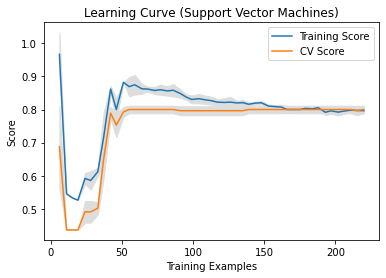

In [70]:
## The learning curve function function in Scikit learn determines scores for cross validation training
train_sizes, train_scores, test_scores = learning_curve(svc, tr_features, tr_labels, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50), verbose=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training Score')
plt.plot(train_sizes, test_scores_mean, label = 'CV Score')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='#DDDDDD')

plt.title('Learning Curve (Support Vector Machines)')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc = 'best')

In [71]:
#Write out pickled model
joblib.dump(cv.best_estimator_, 'SVM_801010.pkl')

['SVM_801010.pkl']

## Validate and Test (80-10-10 set)

In [72]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

val_features = pd.read_csv('val_features.csv')
val_labels = pd.read_csv('val_labels.csv')

te_features = pd.read_csv('test_features.csv')
te_labels = pd.read_csv('test_labels.csv')

In [73]:
models = {}

for mdl in ['SVM', 'RF', 'GB']:
    models[mdl] = joblib.load('{}_801010.pkl'.format(mdl))

In [74]:
models

{'SVM': SVC(C=1, kernel='linear'),
 'RF': RandomForestClassifier(max_depth=4, n_estimators=50),
 'GB': GradientBoostingClassifier(learning_rate=0.01, n_estimators=50)}

In [75]:
#Evaluate models on the validation set
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='micro'), 3)
    recall = round(recall_score(labels, pred, average='micro'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [76]:
# COMPARE performance of models (Accuracy, Precision, Recall)
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 8.0ms
RF -- Accuracy: 0.971 / Precision: 0.971 / Recall: 0.971 / Latency: 16.0ms
GB -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 0.0ms


In [77]:
# Evaluate SVM on test set
evaluate_model('SVM', models['SVM'], te_features, te_labels)

SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 6.3ms


# Analysis and Comparison of Results (80-10-10)

Observations/Comparisons:
* SVM and Gradient Boosting performed the best in terms of accuracy, precsion, and recall on the validation set. In addition, SVM and Gradient Boosting typically both performed as well as each other, typically scoring '1.0' on accuracy, precision, recall,
* Latency varies, for the three algorithms during testing. There is no clear leader in which had better
* In the training set, the performance score across each model were comparable, with the best scores being 0.97 +- 0.01, with the best training score coming from SVM.
* All learning curves for all three models demonstrate RF, SVM, and GB better generalize with more training samples
* SVM appears to have the least variance (shaded areas), but converges on a smaller overall score.

Best model: SVM <br>
Explaination: SVM appears to shows the best accuracy, precision, and recall scores across the three tested models for both the training and the validation sets. The best indicator of this performance is also the learning curve for SVM, showing the cross validation and training score converging to a high score (although not as high as the other training graphs). The shaded areas around the training and CV line represent the error due to bias and variance. Comparitively to the other graphs, SVM has the smallest error due to bias and variance.<br>
Observing the properties of SVM, they best perform when there are clear decision boundaries of the data due to the nature of the algorithm seperating data with hyperplanes. That is, a line in which data is classified into differing groups. From our analysis step, we found that there were clear line boundaries and correlations when R^2 space which seperated and helped determine the differing penguin types (Gentoo's have larger flipper lengths than their counterparts for ex.). In the training step, it was found that linear seperation (i.e., hyperplane is a line) was best for the penguin_sizes dataset, corroborating the fact that SVM with linear hyperplanes are likely the best model

# What was the best proportion or split ratio from the set of experiments conducted?

From the experiments conducted, the best ratio appears to be 80-10-10 from inspection the results. Across both the validation and test sets of data 80-10-10 data splits performed consistently better in accuracy, precision, and recall, scoring a perfect 1.0 in some cases. Results from the training sets between the two were comparable.<br>

The result is likely due to the fact that the data is well behaved. From the analysis, we found that there are strong correlations/boundaries between the data which helped determine the types of penguins. In addition, there are few outliers and noise which could interfere with training. From our learning curves, we can see across RF, GB, and SVM, that all models improve with more training data and can generalize more effectively. Since the validation and test subsets are very well-behaved and similar in behaviour to their training subsets, the performance improvement is seen in the 80-10-10 split over 60-20-20 set having trained with more examples.
